## models


**Regression** | **Classification**
 --- | --- 
LinearRegression | LogisticRegression <span style="color:blue">(**penalty**: 'l2', **solver**: {'liblinear'})</span>
Lasso (L1 regularized) <span style="color:blue">(**alpha**: 1)</span> | LogisticRegression <span style="color:blue">(**alpha**: 1, **penalty**: 'l1', **solver**: {'liblinear', 'sag'})</span>
Ridge (L2 regularized) <span style="color:blue">(**alpha**: 1)</span> | LogisticRegression <span style="color:blue">(**alpha**:1, **penalty**: 'l2', **solver**: {'liblinear','newton-cg', 'lbfgs', 'sag', 'saga'})</span>
ElasticNet <span style="color:blue">(**alpha**: 1, **l1_ratio**: 0.5)</span>| LogisticRegression <span style="color:blue">(**alpha**:1, **l1_ratio**: 0.5, **multi_class**: 'multinomial', **solver**: {'newton-cg', 'lbfgs', 'sag', 'saga'})</span>
KNeighborsRegressor <span style="color:blue">(**n_neighbors**: 5)</span> | KNeighborsClassifier <span style="color:blue">(**n_neighbors**: 5)</span>
DecisionTreeRegressor <span style="color:blue">(**max_depth**: 3, **min_samples_leaf**: 10)</span> | DecisionTreeClassifier <span style="color:blue">(**max_depth**: 3, **min_samples_leaf**: 10)</span>
RandomForestRegressor <span style="color:blue">(**n_estimators**: 10, **max_depth**: 3, **min_samples_leaf**: 10)</span> | RandomForestClassifier <span style="color:blue">(**n_estimators**: 10, **max_depth**: 3, **min_samples_leaf**: 10)</span>
 | VotingClassifier <span style="color:blue">(**voting**: {'hard', 'soft'})</span>

## metrics for n-fold cross-validation and test set performance

**Regression** | **Classification**
--- | ---
MSE (lower is better) | Classification Error (lower is better)
neg_mean_squared_error (higher is better) | accuracy (higher is better)
 | AUC
 | f1
 
 

## Using [GridSearchCV()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

```python
from sklearn import datasets
from sklearn.linear_models import LogisticRegression
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()
parameters = {'alpha':[0.1, 1, 10], 'solver':['liblinear', 'lbfgs', 'sag']}
log_clf = LogisticRegression(penalty='l2')
clf = GridSearchCV(log_clf, parameters, scoring="accuracy")
clf.fit(iris.data, iris.target)

>> sorted(clf.cv_results_.keys())
...                             
['mean_fit_time', 'mean_score_time', 'mean_test_score',...
 'mean_train_score', 'param_C', 'param_kernel', 'params',...
 'rank_test_score', 'split0_test_score',...
 'split0_train_score', 'split1_test_score', 'split1_train_score',...
 'split2_test_score', 'split2_train_score',...
 'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'...]
 
 # best parameter combination is the row which has the best score/rank of 1
>> pd.DataFrame(clf.cv_results_)
```

In [94]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()

In [95]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### before starting on trees
```bash
# remember to run the following installs
> brew install graphviz
> pip3 install pydotplus
```

In [100]:
from sklearn.tree import DecisionTreeClassifier

iris = sns.load_dataset('iris')

clf = DecisionTreeClassifier(max_depth=3)

x = iris.drop("species", axis=1)
y = iris["species"]
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [102]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

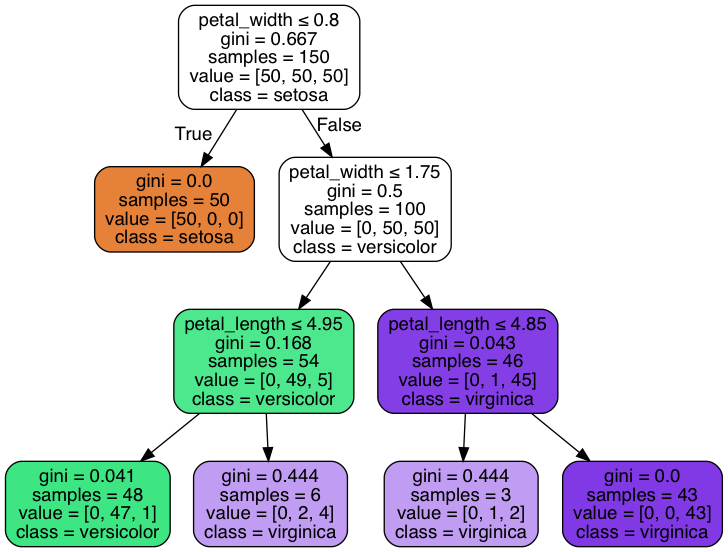

In [103]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, 
                rounded=True,
                class_names=y.unique(),
                feature_names=x.columns,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [109]:
from scipy.special import comb

def prob_majority_is_right(N, p):
    start = N//2 + 1
    total=0
    for k in range(start, N+1):
        total += comb(N,k) * p**k * (1-p)**(N-k)
    return total

for N in range(1,1001,10):
    print("P(majority is right for size {0}):\n {1:.2f}".format(N, prob_majority_is_right(N,0.51)))


P(majority is right for size 1):
 0.51
P(majority is right for size 11):
 0.53
P(majority is right for size 21):
 0.54
P(majority is right for size 31):
 0.54
P(majority is right for size 41):
 0.55
P(majority is right for size 51):
 0.56
P(majority is right for size 61):
 0.56
P(majority is right for size 71):
 0.57
P(majority is right for size 81):
 0.57
P(majority is right for size 91):
 0.58
P(majority is right for size 101):
 0.58
P(majority is right for size 111):
 0.58
P(majority is right for size 121):
 0.59
P(majority is right for size 131):
 0.59
P(majority is right for size 141):
 0.59
P(majority is right for size 151):
 0.60
P(majority is right for size 161):
 0.60
P(majority is right for size 171):
 0.60
P(majority is right for size 181):
 0.61
P(majority is right for size 191):
 0.61
P(majority is right for size 201):
 0.61
P(majority is right for size 211):
 0.61
P(majority is right for size 221):
 0.62
P(majority is right for size 231):
 0.62
P(majority is right for siz

In [ ]:
# VotingClassifier

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 

log_clf = LogisticRegression() 
rnd_clf = RandomForestClassifier() 
knn_clf = KNeighborsClassifier() 

voting_clf = VotingClassifier(voting =' hard',
    estimators =[(' lr', log_clf), (' rf', rnd_clf), (' knn', knn_clf)]) 